In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
test_df=pd.read_csv("/content/test_2umaH9m.csv")
train_df=pd.read_csv("/content/train_LZdllcl.csv")
sample_submission=pd.read_csv("/content/sample_submission_M0L0uXE.csv")

In [522]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [523]:
train_df.shape

(54808, 14)

In [524]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [525]:
train_df.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [526]:
train_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [527]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# **Data Preprocessing of Train dataset**

In [528]:

train_df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [529]:
train_num=train_df.select_dtypes(include=["int64","float64"])
train_num

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0
54804,74592,1,37,2.0,6,0,0,56,0
54805,13918,1,27,5.0,3,1,0,79,0
54806,13614,1,29,1.0,2,0,0,45,0


In [530]:
train_cat=train_df.select_dtypes(include="object")
train_cat

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


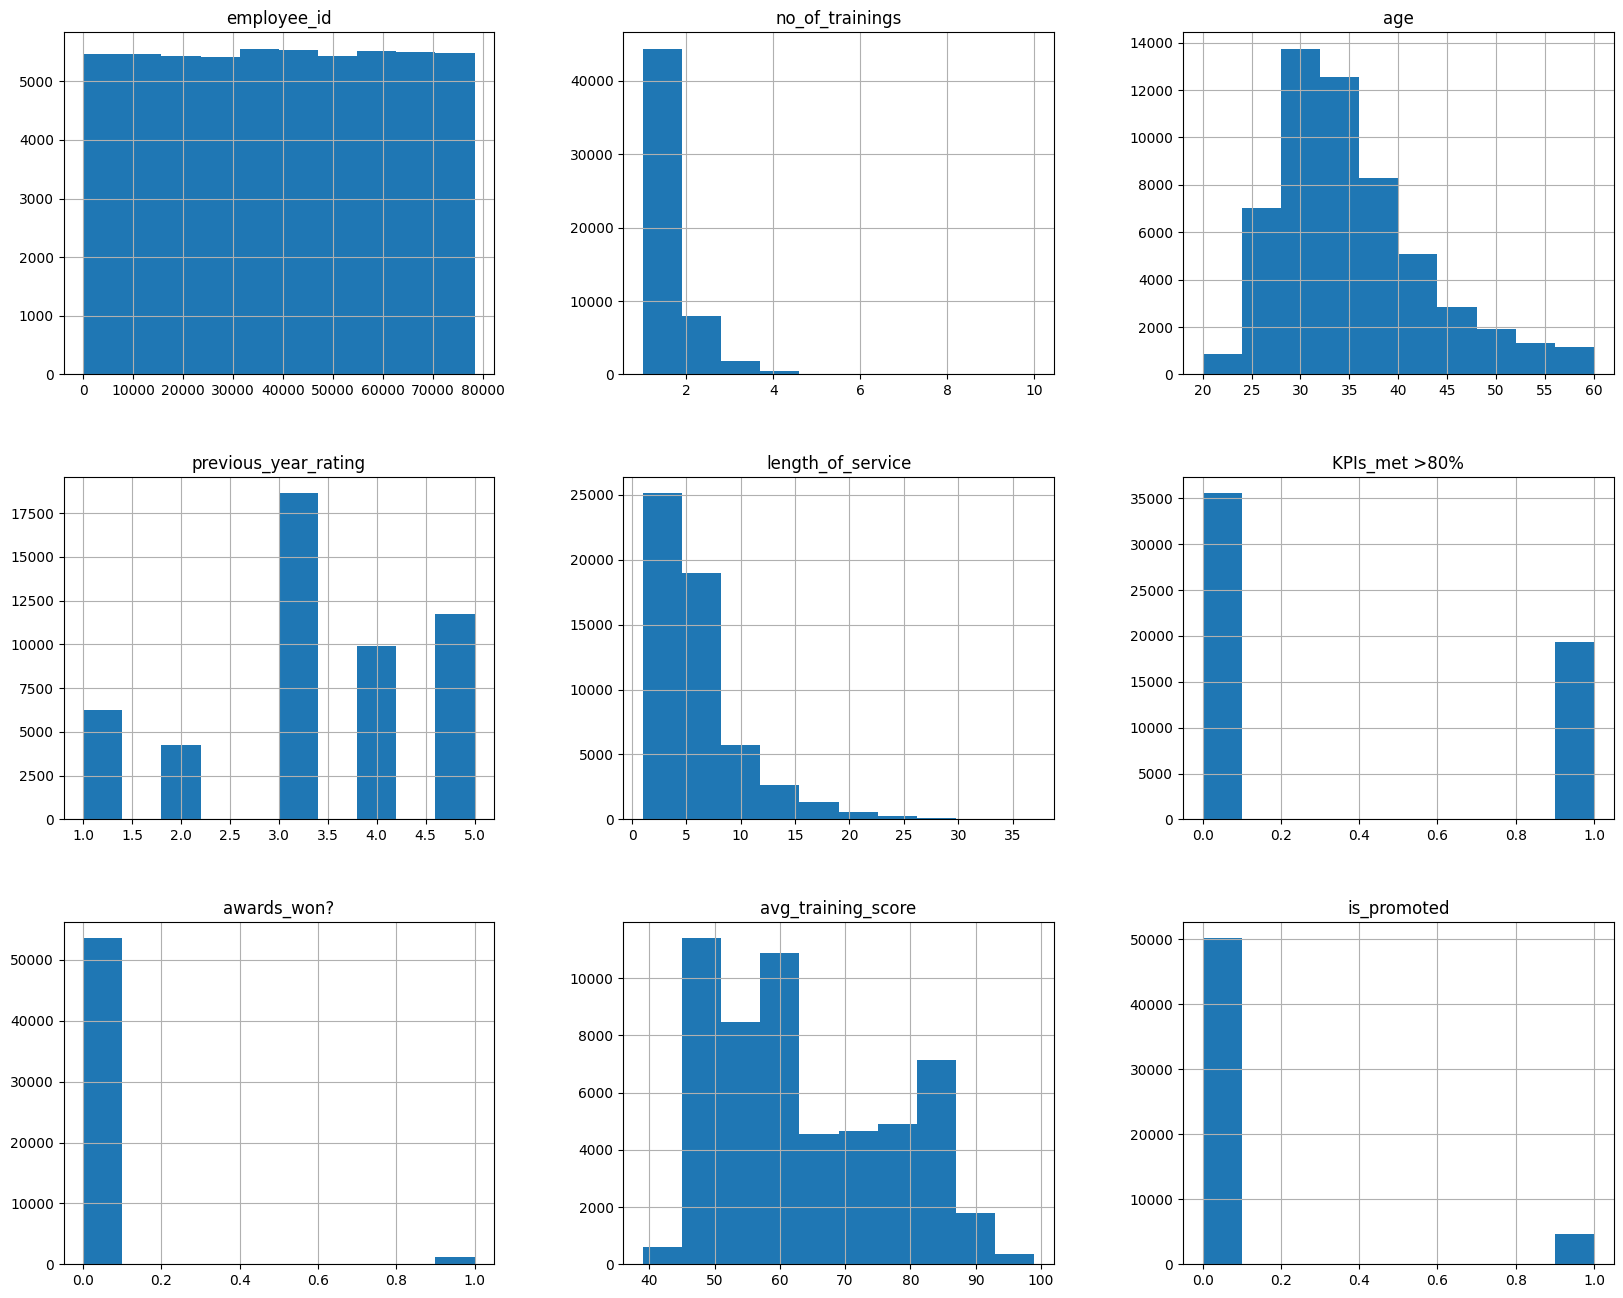

In [531]:
train_df.hist(figsize=[20,16])
plt.show()

In [532]:
train_df["education"] = train_df["education"].astype(str)
train_df["previous_year_rating"]=train_df["previous_year_rating"].fillna(train_df["previous_year_rating"].median())

In [533]:
train_df["education"] = train_df["education"].astype(str)
train_df["education"].fillna(train_df["education"].mode()[0], inplace=True)


<ipython-input-533-73c34c02cb9f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["education"].fillna(train_df["education"].mode()[0], inplace=True)


In [534]:

train_df.isna().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


<ipython-input-535-7d5de9c9c102>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(train_num.values, labels=train_num.columns)


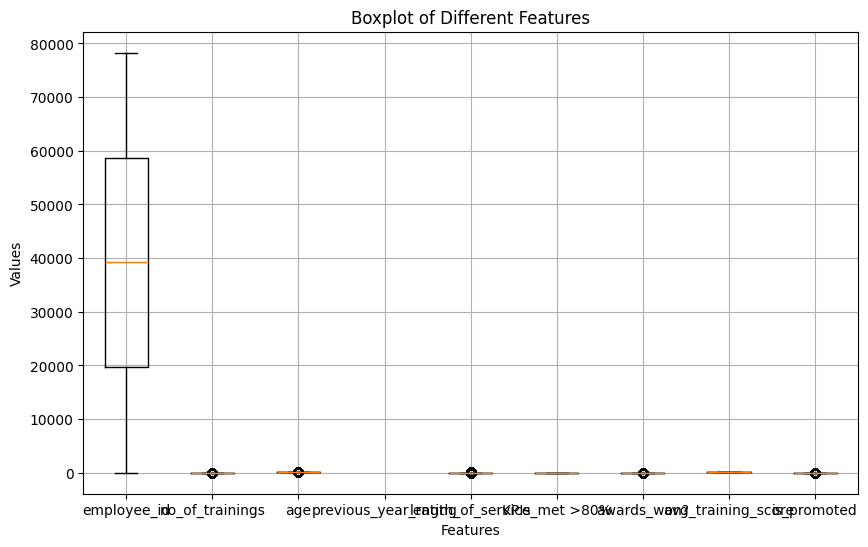

In [535]:
# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(train_num.values, labels=train_num.columns)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Different Features")
plt.grid(True)

plt.show()

In [536]:
train_df= train_df.drop(columns=['employee_id','region',"recruitment_channel"])
train_df


,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,m,1,48,3.0,17,0,0,78,0
54804,Operations,Master's & above,f,1,37,2.0,6,0,0,56,0
54805,Analytics,Bachelor's,m,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,nan,m,1,29,1.0,2,0,0,45,0


In [537]:
train_df["education"].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
nan,2409
Below Secondary,805


In [538]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df["education"]=le.fit_transform(train_df["education"])

In [539]:
train_df["gender"].value_counts()

,count
gender,
m,38496
f,16312


In [540]:
train_df["gender"]=le.fit_transform(train_df["gender"])

In [541]:
train_df

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,2,0,1,35,5.0,8,1,0,49,0
1,Operations,0,1,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,0,1,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,0,1,2,39,1.0,10,0,0,50,0
4,Technology,0,1,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,0,1,1,48,3.0,17,0,0,78,0
54804,Operations,2,0,1,37,2.0,6,0,0,56,0
54805,Analytics,0,1,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,3,1,1,29,1.0,2,0,0,45,0


In [542]:
train_df["department"].value_counts()

,count
department,
Sales & Marketing,16840
Operations,11348
Technology,7138
Procurement,7138
Analytics,5352
Finance,2536
HR,2418
Legal,1039
R&D,999


In [543]:
train_df["department"]=le.fit_transform(train_df["department"])

In [544]:
train_df

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,2,0,1,35,5.0,8,1,0,49,0
1,4,0,1,1,30,5.0,4,0,0,60,0
2,7,0,1,1,34,3.0,7,0,0,50,0
3,7,0,1,2,39,1.0,10,0,0,50,0
4,8,0,1,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,8,0,1,1,48,3.0,17,0,0,78,0
54804,4,2,0,1,37,2.0,6,0,0,56,0
54805,0,0,1,1,27,5.0,3,1,0,79,0
54806,7,3,1,1,29,1.0,2,0,0,45,0


<Axes: >

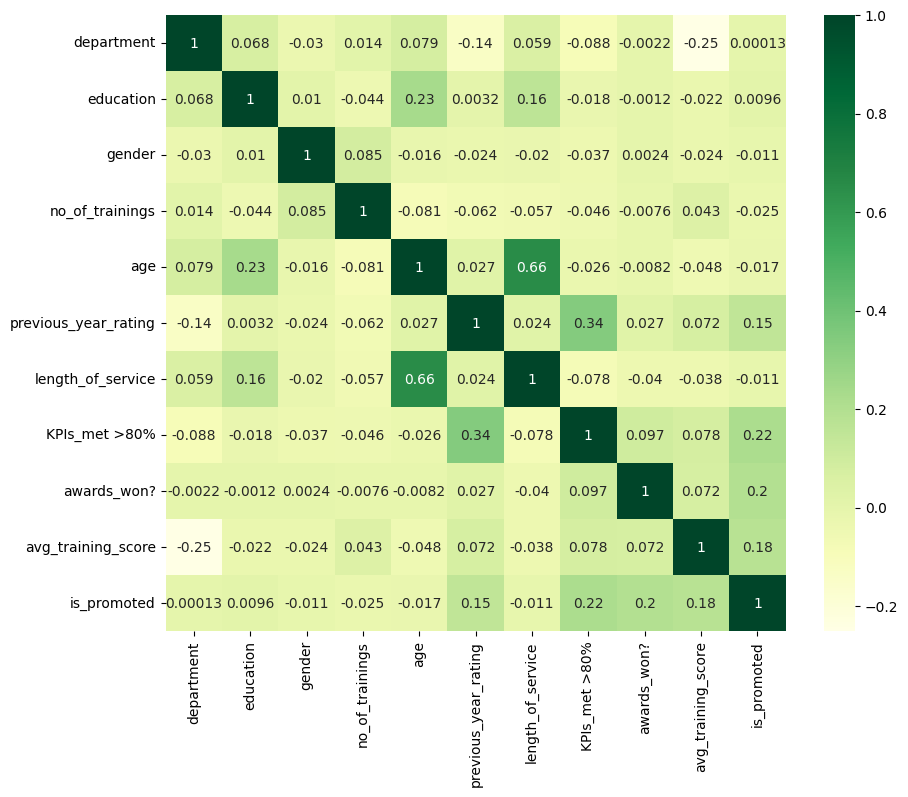

In [545]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
# plot the heatmap
sns.heatmap(corr,annot=True,cmap="YlGn")

In [546]:
train_df=train_df.drop("department",axis=1)

In [547]:
train_df

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,2,0,1,35,5.0,8,1,0,49,0
1,0,1,1,30,5.0,4,0,0,60,0
2,0,1,1,34,3.0,7,0,0,50,0
3,0,1,2,39,1.0,10,0,0,50,0
4,0,1,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54803,0,1,1,48,3.0,17,0,0,78,0
54804,2,0,1,37,2.0,6,0,0,56,0
54805,0,1,1,27,5.0,3,1,0,79,0
54806,3,1,1,29,1.0,2,0,0,45,0


In [548]:
x_train=train_df.drop(["is_promoted"],axis=1)
y_train=train_df["is_promoted"]


In [549]:
x_train.columns

Index(['education', 'gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [550]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)

In [551]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [552]:
x_train_scaled

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.294786,-1.536223,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931
1,-0.683763,0.650947,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282
2,-0.683763,0.650947,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145
3,-0.683763,0.650947,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145
4,-0.683763,0.650947,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939
...,...,...,...,...,...,...,...,...,...
54803,-0.683763,0.650947,-0.415276,1.722704,-0.250651,2.610632,-0.736986,-0.154018,1.092871
54804,1.294786,-1.536223,-0.415276,0.286691,-1.073860,0.031532,-0.736986,-0.154018,-0.552428
54805,-0.683763,0.650947,-0.415276,-1.018775,1.395766,-0.671858,1.356878,-0.154018,1.167657
54806,2.284061,0.650947,-0.415276,-0.757681,-1.897069,-0.906322,-0.736986,-0.154018,-1.375077


In [553]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train_scaled,y_train,random_state=42,test_size=0.2)

# **LOGISITC REGRESSION**

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_log_pred =lr.predict(x_test)
y_log_pred
acc_log = accuracy_score(y_test,y_log_pred)
pre_log = precision_score(y_test,y_log_pred,average='weighted')
re_log = recall_score(y_test,y_log_pred,average='weighted')
f1_log = f1_score(y_test,y_log_pred,average='weighted')

# **DECISION TREE**

In [555]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred_dt)
pre_dt = precision_score(y_test,y_pred_dt, average='weighted')
re_dt = recall_score(y_test,y_pred_dt, average='weighted')
f1_dt = f1_score(y_test,y_pred_dt, average='weighted')

## **Randanom Forest Model**

In [556]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf, average='weighted')
re_rf = recall_score(y_test,y_pred_rf, average='weighted')
f1_rf = f1_score(y_test,y_pred_rf, average='weighted')


# **SVM**

In [557]:
from sklearn.svm import SVC
sv= SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)
acc_sv = accuracy_score(y_test,y_pred_sv)
pre_sv = precision_score(y_test,y_pred_sv, average='weighted')
re_sv = recall_score(y_test,y_pred_sv, average='weighted')
f1_sv = f1_score(y_test,y_pred_sv, average='weighted')


# **KNN**

Text(0, 0.5, 'accuracy')

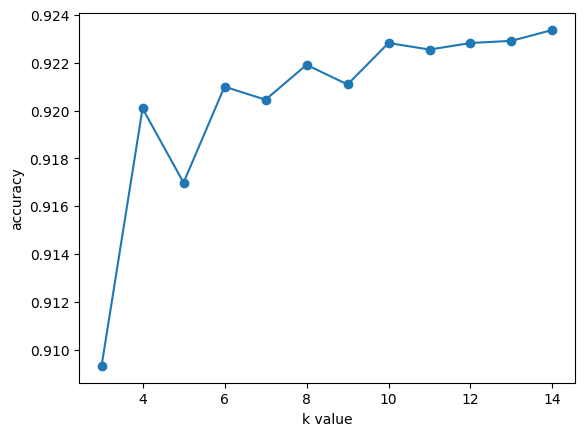

In [558]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors =np.arange(3,15)
for k in neighbors:
    k_model=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    k_model.fit(x_train,y_train)
    y_pred_knn=k_model.predict(x_test)
    acc_knn=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [559]:
knn=KNeighborsClassifier(n_neighbors=14,metric="minkowski")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
pre_knn = precision_score(y_test,y_pred_knn, average='weighted')
re_knn = recall_score(y_test,y_pred_knn, average='weighted')
f1_knn = f1_score(y_test,y_pred_knn, average='weighted')

In [560]:
Accuracy = pd.DataFrame({'Models': ['Logistic Regression', 'KNN','Decision Tree', 'Random Forest','SVM'],
                         'Accuracies':[acc_log,acc_knn,acc_dt,acc_rf,acc_sv]})


In [561]:
Accuracy

,Models,Accuracies
0,Logistic Regression,0.919358
1,KNN,0.923372
2,Decision Tree,0.874475
3,Random Forest,0.915618
4,SVM,0.922003


Here i got best model KNN

# **preprocessing on test data set**

In [490]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [491]:
test_df.shape

(23490, 13)

In [492]:
test_df.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [493]:
test_df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [494]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [495]:
test_df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [496]:
test_num=test_df.select_dtypes(include=["int64","float64"])
test_num

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,1,24,NaN,1,1,0,77
1,74430,1,31,3.0,5,0,0,51
2,72255,1,31,1.0,4,0,0,47
3,38562,3,31,2.0,9,0,0,65
4,64486,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...
23485,53478,1,24,3.0,1,0,0,61
23486,25600,1,31,3.0,7,0,0,74
23487,45409,1,26,4.0,4,0,0,50
23488,1186,3,27,NaN,1,0,0,70


In [497]:
test_cat=test_df.select_dtypes(include="object")
test_cat

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelor's,m,sourcing
1,HR,region_4,Bachelor's,f,other
2,Sales & Marketing,region_13,Bachelor's,m,other
3,Procurement,region_2,Bachelor's,f,other
4,Finance,region_29,Bachelor's,m,sourcing
...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing
23486,Technology,region_25,Bachelor's,m,sourcing
23487,HR,region_16,Bachelor's,f,sourcing
23488,Procurement,region_31,Bachelor's,m,sourcing


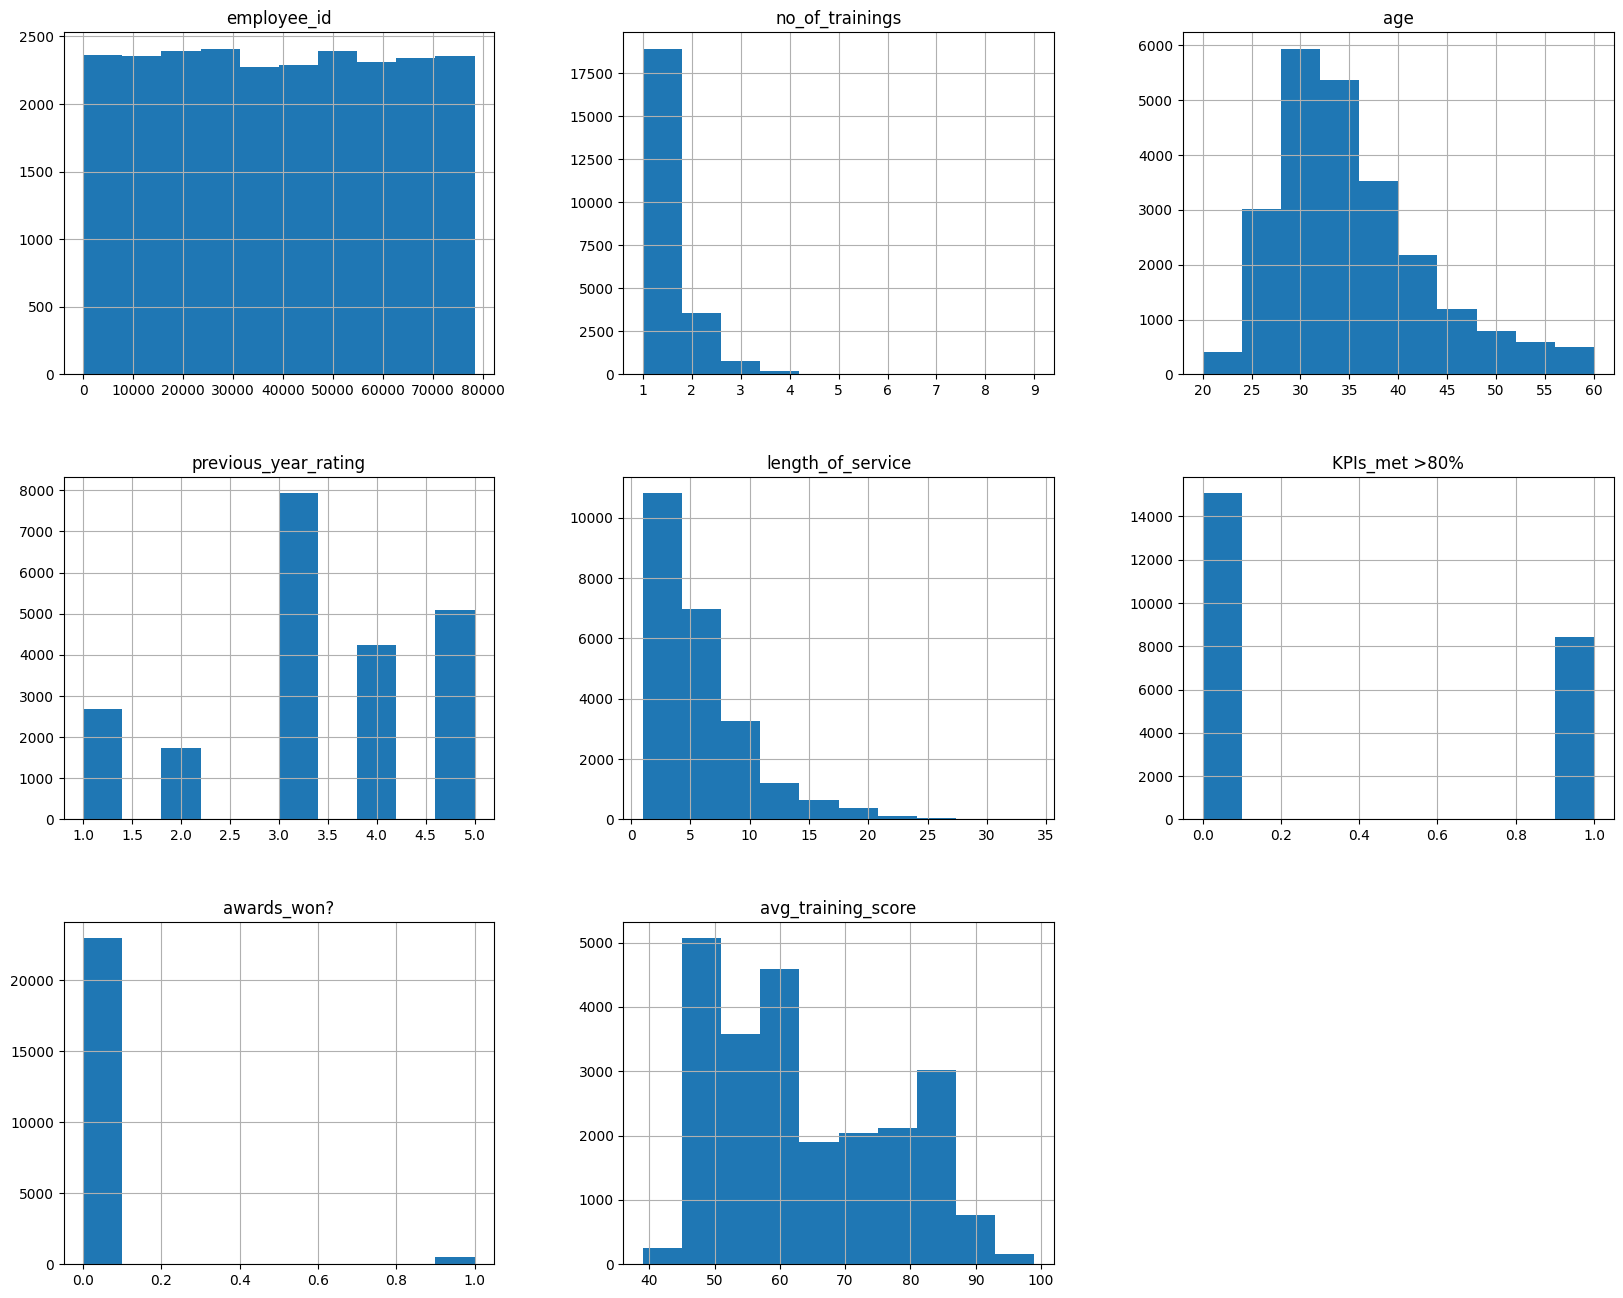

In [498]:
test_df.hist(figsize=[20,16])
plt.show()

In [499]:
test_df["education"] = test_df["education"].astype(str)
test_df["previous_year_rating"]=test_df["previous_year_rating"].fillna(test_df["previous_year_rating"].median())

In [500]:
test_df["education"] = test_df["education"].astype(str)
test_df["education"].fillna(test_df["education"].mode()[0], inplace=True)


<ipython-input-500-9f38f15f665b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["education"].fillna(test_df["education"].mode()[0], inplace=True)


In [501]:
test_df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [502]:
test_df= test_df.drop(columns=['employee_id','region',"recruitment_channel"])
test_df

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...
23485,Legal,Below Secondary,m,1,24,3.0,1,0,0,61
23486,Technology,Bachelor's,m,1,31,3.0,7,0,0,74
23487,HR,Bachelor's,f,1,26,4.0,4,0,0,50
23488,Procurement,Bachelor's,m,3,27,3.0,1,0,0,70


In [503]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_df["education"]=le.fit_transform(test_df["education"])

In [504]:
test_df["gender"]=le.fit_transform(test_df["gender"])

In [505]:
test_df["department"]=le.fit_transform(test_df["department"])

<Axes: >

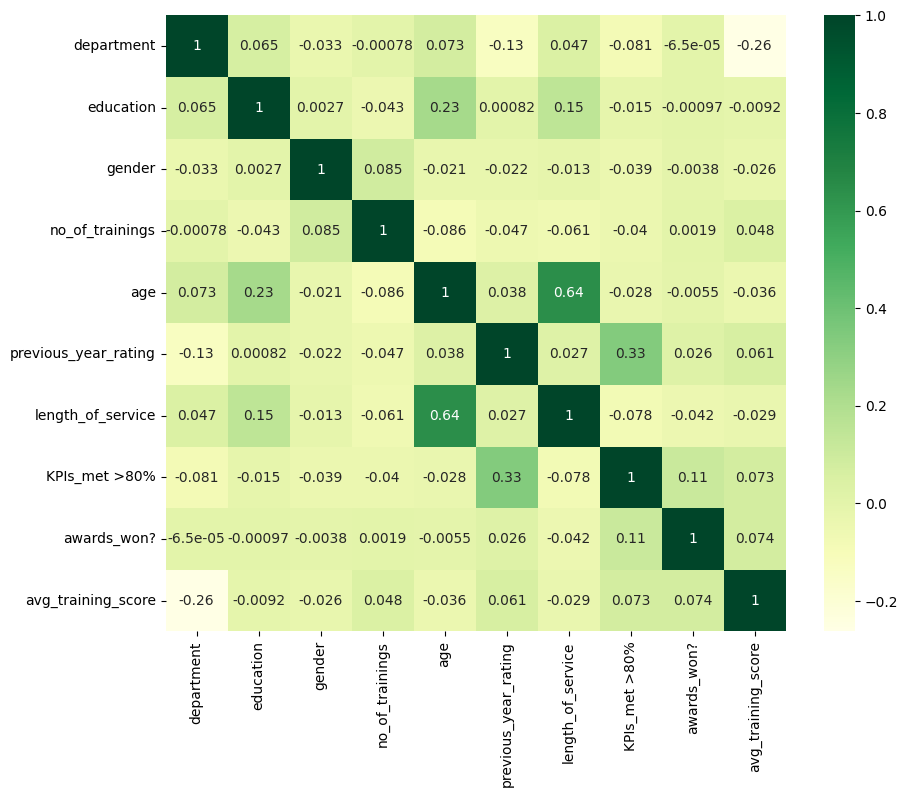

In [506]:
corr = test_df.corr()
plt.figure(figsize=(10,8))
# plot the heatmap
sns.heatmap(corr,annot=True,cmap="YlGn")

In [507]:
test_df=test_df.drop(columns=["department"],axis=1)

In [508]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
test_scaled=sc.fit_transform(test_df)

In [509]:
test_scaled = pd.DataFrame(test_scaled, columns=test_df.columns)

In [510]:
test_scaled

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,-0.692399,0.644516,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263
1,-0.692399,-1.551551,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377
2,-0.692399,0.644516,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629
3,-0.692399,-1.551551,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506
4,-0.692399,0.644516,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746
...,...,...,...,...,...,...,...,...,...
23485,0.294282,0.644516,-0.423094,-1.404150,-0.257191,-1.143200,-0.748103,-0.152665,-0.168746
23486,-0.692399,0.644516,-0.423094,-0.492612,-0.257191,0.282714,-0.748103,-0.152665,0.800574
23487,-0.692399,-1.551551,-0.423094,-1.143711,0.564547,-0.430243,-0.748103,-0.152665,-0.988940
23488,-0.692399,0.644516,2.905264,-1.013491,-0.257191,-1.143200,-0.748103,-0.152665,0.502321


# **Best Model Selected-KNN**

In [512]:
knn=KNeighborsClassifier(n_neighbors=14,metric="minkowski")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(test_scaled)

In [513]:
print(len(y_pred_knn))
print(len(sample_submission))

23490
23490


In [516]:
sample_submission['is_promoted'] = y_pred_knn

In [517]:
sample_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [519]:
sample_submission.to_csv('submission_knn.csv', index=False)
print("Updated submission file saved as 'submission_knn.csv'")

Updated submission file saved as 'submission_knn.csv'
